# Supervised CARE Training
Here we will train a plain N2V network on single noisy images.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

(100, 1024, 1024, 1) (100, 1024, 1024, 1)
(100, 1024, 1024, 2) (100, 1024, 1024, 1)


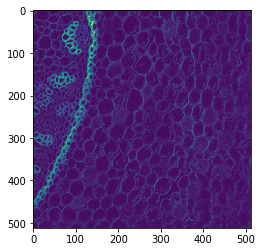

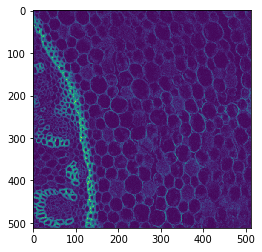

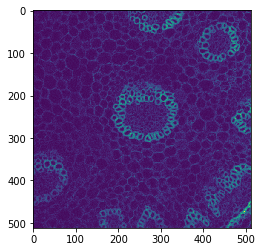

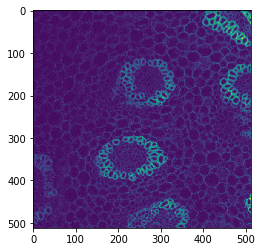

In [33]:
path='data/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')
dataGT = np.mean(data,axis=0)[np.newaxis,...,np.newaxis]

data=data[...,np.newaxis]

dataGT = np.repeat(dataGT, 100, axis=0)
print(data.shape,dataGT.shape)
data = np.concatenate((data,dataGT),axis=-1)
print(data.shape,dataGT.shape)




plt.imshow(data[0,512:,512:,0])
plt.show()
plt.imshow(data[0,:512,512:,0])
plt.show()
plt.imshow(data[0,512:,:512,0])
plt.show()

plt.imshow(data[0,:512,:512,0])
plt.show()

# We now crop away the data that has is to be used for testing
data=np.concatenate( (data[:,512:,512:,:], data[:,:512,512:,:], data[:,512:,:512,:])  )


### Create the Network and Train it
This can take a while.

In [35]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv_CARE', directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3, supervised=True)

Epoch 0 finished      
avg. loss: 0.477246155589819+-(2SEM)0.22027997402827992      
Epoch 1 finished      
avg. loss: 0.2754294894635677+-(2SEM)0.036899215610378594      
Epoch 2 finished      
avg. loss: 0.07411045227199793+-(2SEM)0.02235859230889839      
Epoch 3 finished      
avg. loss: 0.08476734329015016+-(2SEM)0.057755985676942456      
Epoch 4 finished      
avg. loss: 0.07566132959909737+-(2SEM)0.0388221268167586      
Epoch 5 finished      
avg. loss: 0.05168865043669939+-(2SEM)0.0262370548388975      
Epoch 6 finished      
avg. loss: 0.035359908966347574+-(2SEM)0.013612661804987053      
Epoch 7 finished      
avg. loss: 0.031963921757414936+-(2SEM)0.009898588657589988      
Epoch 8 finished      
avg. loss: 0.03756537260487676+-(2SEM)0.012607089726187936      
Epoch 9 finished      
avg. loss: 0.029506515944376588+-(2SEM)0.008180817557397685      
Epoch 10 finished      
avg. loss: 0.0362376612611115+-(2SEM)0.01550561984578895      
Epoch 11 finished      
avg. loss: 0.03

Epoch 89 finished      
avg. loss: 0.01647885199636221+-(2SEM)0.004806788805497466      
Epoch 90 finished      
avg. loss: 0.017518614185974002+-(2SEM)0.005266590833800372      
Epoch 91 finished      
avg. loss: 0.016148684150539338+-(2SEM)0.00497201564003686      
Epoch 92 finished      
avg. loss: 0.018678958830423652+-(2SEM)0.005518268645804949      
Epoch 93 finished      
avg. loss: 0.015455851284787058+-(2SEM)0.003605678481223364      
Epoch 94 finished      
avg. loss: 0.015076094097457826+-(2SEM)0.0038182582008945455      
Epoch 95 finished      
avg. loss: 0.014885290316306055+-(2SEM)0.0035177544991361258      
Epoch    95: reducing learning rate of group 0 to 3.1250e-05.
Epoch 96 finished      
avg. loss: 0.01441778801381588+-(2SEM)0.004036821418121269      
Epoch 97 finished      
avg. loss: 0.014924641465768218+-(2SEM)0.004255244618918759      
Epoch 98 finished      
avg. loss: 0.01338803693652153+-(2SEM)0.0018842176717839226      
Epoch 99 finished      
avg. loss: 0.01

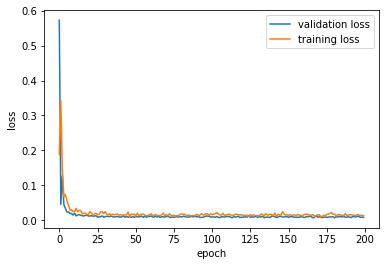

In [31]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()